In [31]:
#Section1,Q1
import cv2

img=cv2.imread("background.jpg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray image",gray_image)
cv2.waitKey(0)  

Gaussian = cv2.GaussianBlur(img, (1, 21), 0) 
cv2.imshow('Gaussian Blurring', Gaussian) 
cv2.waitKey(0) 

edge = cv2.Canny(img, 10, 1000)
cv2.imshow('edges', edge) 
cv2.waitKey(0) 

cv2.destroyAllWindows()



In [32]:
#Q2
cv2.imshow("image",img)
cv2.waitKey(0)

rotate = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
cv2.imshow("rotated",rotate)
cv2.waitKey(0)

scaled = cv2.resize(img, (700,500), interpolation = cv2.INTER_CUBIC)
cv2.imshow("scaled",scaled)
cv2.waitKey(0)

flipped = cv2.flip(img,1)
cv2.imshow("flipped",flipped)
cv2.waitKey(0)

cv2.destroyAllWindows()


In [15]:
#Section B
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import keras

(X_train, y_train), (x_test,y_test) = mnist.load_data()
#Splitting the dataset into test and training


In [16]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation = 'sigmoid'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(10,activation = 'softmax'),


])
#making a sequential network of layers - 2 convolutional, 2 pooling, 1 flatten and 1 dense output layers

c:\Users\ishit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy,optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])
#using sparse categorical crossentropy and adadelta optimizers in the model

In [19]:
hist = model.fit(X_train,y_train,epochs = 5,batch_size = 30)
#training the data set with 5 epochs

Epoch 1/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4062 - loss: 1.9783
Epoch 2/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4988 - loss: 1.8576
Epoch 3/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5653 - loss: 1.7510
Epoch 4/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6138 - loss: 1.6516
Epoch 5/5
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6509 - loss: 1.5644


In [20]:
result = model.evaluate(x_test,y_test)
print(result)
#testing the model using the test dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6607 - loss: 1.5166
[1.4878872632980347, 0.6836000084877014]


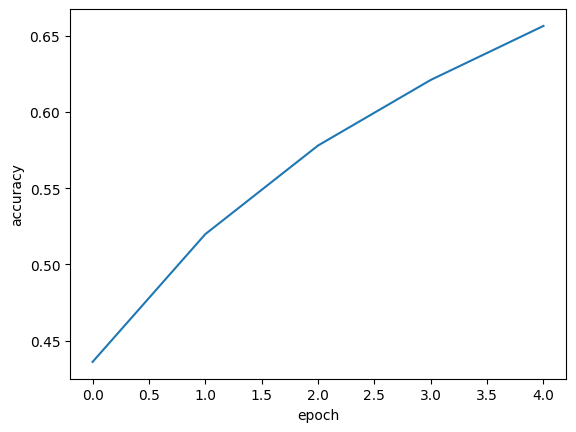

In [21]:
plt.plot(hist.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

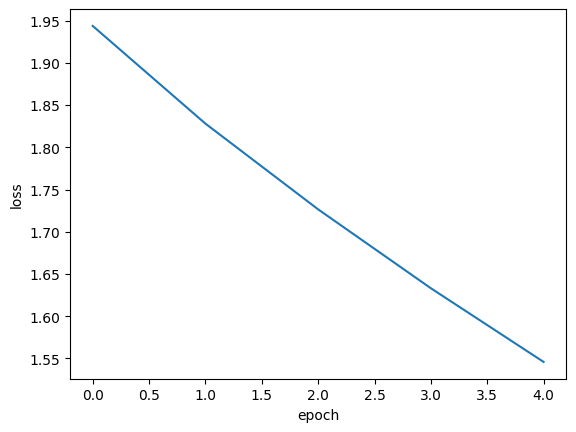

In [22]:
plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
#Section C
import cv2
import numpy as np
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg") 
classes = []
with open("coco.names", "r") as f: 
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]


colors = np.random.uniform(0, 255, size=(len(classes), 3))


img = cv2.imread("img1.jpg")  
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape


blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)


class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        if confidence > 0.5:
            
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            
           
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]  
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)


cv2.imshow("img1", img)
cv2.waitKey(0)
img = cv2.imread("img2.jpg") 
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape


blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)


class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        if confidence > 0.5:
            
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            
            
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]  
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)


cv2.imshow("img2", img)
cv2.waitKey(0)
img = cv2.imread("img3.jpg")  
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape


blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)


class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        if confidence > 0.5:
            
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            
            
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]  
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)


cv2.imshow("img3", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Yolo segments the image into many tiny grids. These grids are processed to find the probability of an object within it using cnn. this returns a confidence score. Now, the confidence score of all the grids are processed to figure out yhe location of the objects.


In [79]:
#SectionD
import numpy as np
import cv2

img = cv2.imread('img11.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray,127,255,1)

contours,h = cv2.findContours(thresh,1,2)

for cnt in contours:
    if cv2.contourArea(cnt) > 100:
        approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
            
        if len(approx) > 15:
            x1, y1, w1, h1 = cv2.boundingRect(cnt)
            for cnt2 in contours:
                x2, y2, w2, h2 = cv2.boundingRect(cnt2)
                if (x1 <= x2 and y1 <= y2 and x1 + w1 >= x2 + w2 and y1 + h1 >= y2 + h2):
                    if cv2.contourArea(cnt2) > 100:
                        approx1 = cv2.approxPolyDP(cnt2,0.01*cv2.arcLength(cnt2,True),True)
                        if len(approx1)==3:
                            cv2.rectangle(img, (x1, y1), (x1+w1, y1+h1), (0, 255, 0), 2)
                            cv2.rectangle(img, (x2, y2), (x2+w2, y2+h2), (0, 255, 0), 2)
                            
                            
            

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()